Install all the packages and use them

In [91]:
library(dplyr)
library(ggplot2)
library(RSQLite)

In [92]:
pewSQLdb = dbConnect(dbDriver("SQLite"),
  dbname = "pew_research_db")

Read the csv file

In [93]:
result_data<-read.csv("June 10-July 12, 2015 - Gaming, Jobs and Broadband - CSV.csv", header = TRUE)

Write contents of csv file 

In [94]:
dbWriteTable(pewSQLdb, "result", result_data)
rm(result_data)

[1] TRUE

Query 1: To determine the how many employees perform manual and physical work 

In [187]:
query1 <- dbGetQuery(pewSQLdb, "SELECT emptype2, COUNT(emptype1) AS COUNT
            FROM result
            WHERE emptype2=2 OR
                   emptype2= 1 
            GROUP BY emptype2;")
show(query1)

  emptype2 COUNT
1        1   446
2        2   652


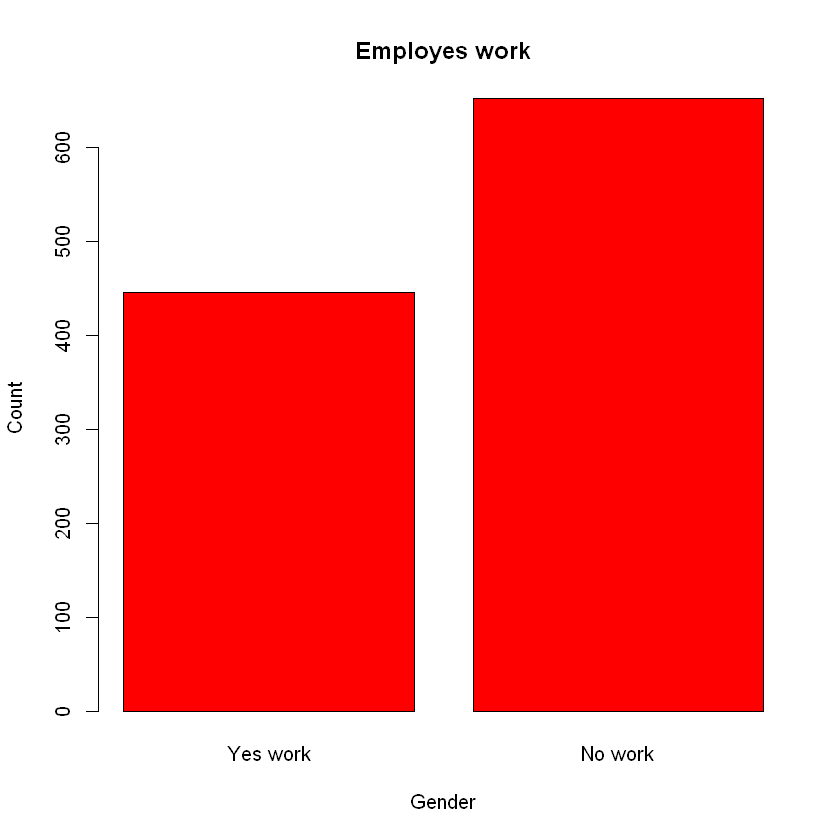

In [202]:
barplot(as.numeric(as.character(query1$COUNT)),names.arg=c("Yes work","No work"), xlab="Gender", ylab="Count",col="red", main="Employes work")

Query 2: To determine how people find the difficulty level in creating a resume

In [158]:
query2<- dbGetQuery(pewSQLdb, "SELECT DISTINCT job1a, sum(job1a) AS resume_easiness
    FROM result
    WHERE  job1a= 1 OR
           job1a= 2 OR
            job1a= 3 OR
            job1a= 4 OR
            job1a= 5       
    GROUP BY job1a")

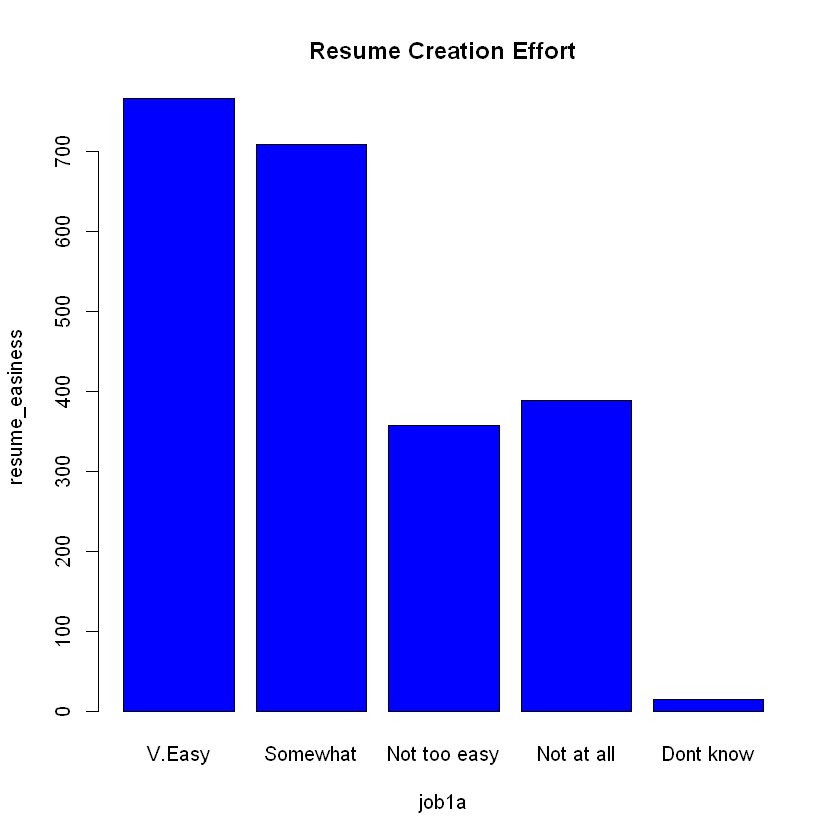

In [161]:
barplot(as.numeric(as.character(query2$resume_easiness)),names.arg=c("V.Easy","Somewhat","Not too easy","Not at all","Dont know"), xlab="job1a", ylab="resume_easiness",col="blue", main="Resume Creation Effort")

Query 3:To determine the gender wise education level

In [182]:
query3 <- dbGetQuery(pewSQLdb, " SELECT sex, (Case when educ2=1 then 'No_HS'
                                                    When educ2=2 then 'In_HS' 
                                                    When educ2=3 then 'HS' 
                                                    when educ2=4 then 'colg' 
                                                    when educ2=5 then '2Yr' 
                                                    when educ2=6 then 'UG' 
                                                    when educ2=7 then 'G' 
                                                    when educ2=8 then 'PG' END) AS Education, 
                        COUNT(educ2) AS Count FROM result 
                WHERE educ2=1 OR educ2=2 OR educ2=3 OR educ2=4 OR educ2=5 OR educ2=6 OR educ2=7 OR educ2=8
                GROUP BY sex,educ2")


$y
[1] "Count"

attr(,"class")
[1] "labels"

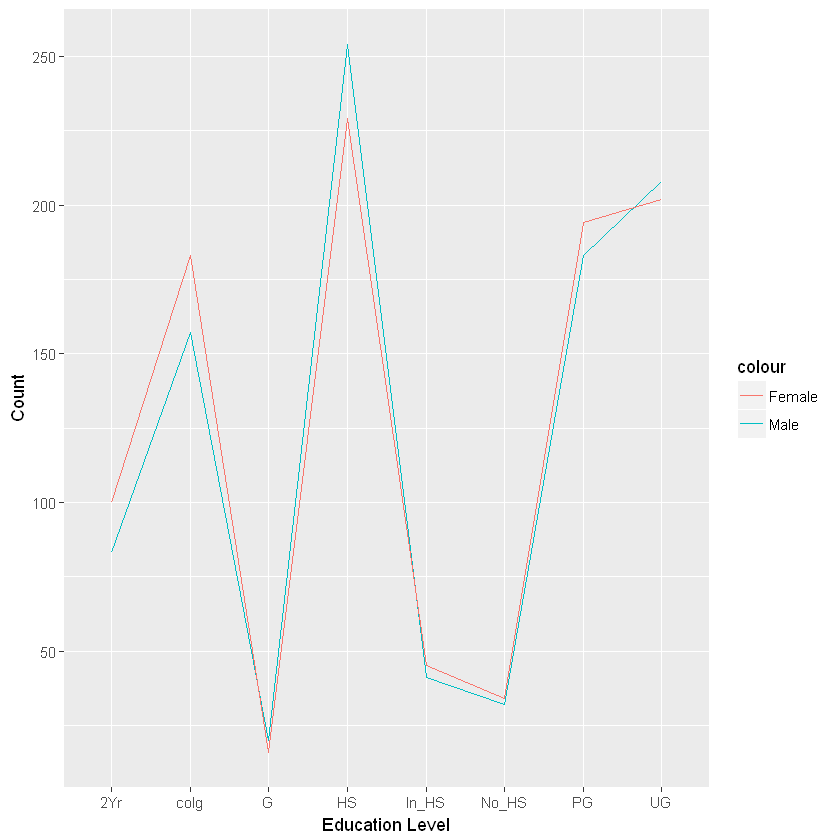

In [183]:
MaleStats <- subset(query3,sex==1)
FemaleStats <- subset(query3,sex==2)
ggplot(query3, aes(x=Education,y=Count,group=sex)) +
 geom_line(data = MaleStats,  aes(x=Education,y=Count,color="Male")) +
 geom_line(data = FemaleStats,  aes(x=Education,y=Count,color="Female")) +
 xlab("Education Level")
 ylab("Count")

Query 4: To determine the age of people who uses internet

In [184]:
query4 <-dbGetQuery(pewSQLdb, "SELECT age, count(*) as count from result where home4nw=1 group by age")

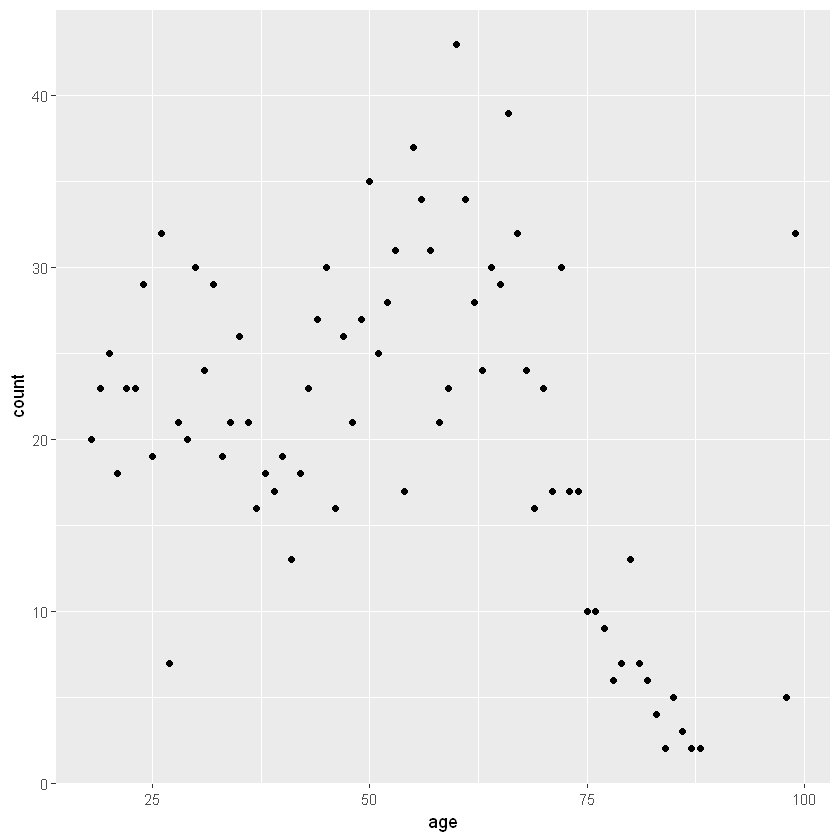

In [185]:
ggplot(query4,aes(x=age,y=count)) + geom_point()

Query 5: To determine the gender wise dating analysis

In [195]:
query5 <- dbGetQuery(pewSQLdb, "SELECT sex, date3a, count(date3a) AS DATING
                    FROM result
                    WHERE date3a=1 OR date3a=2
                    group by  sex, date3a")

show(query5)

  sex date3a DATING
1   1      1    385
2   1      2    593
3   2      1    429
4   2      2    564


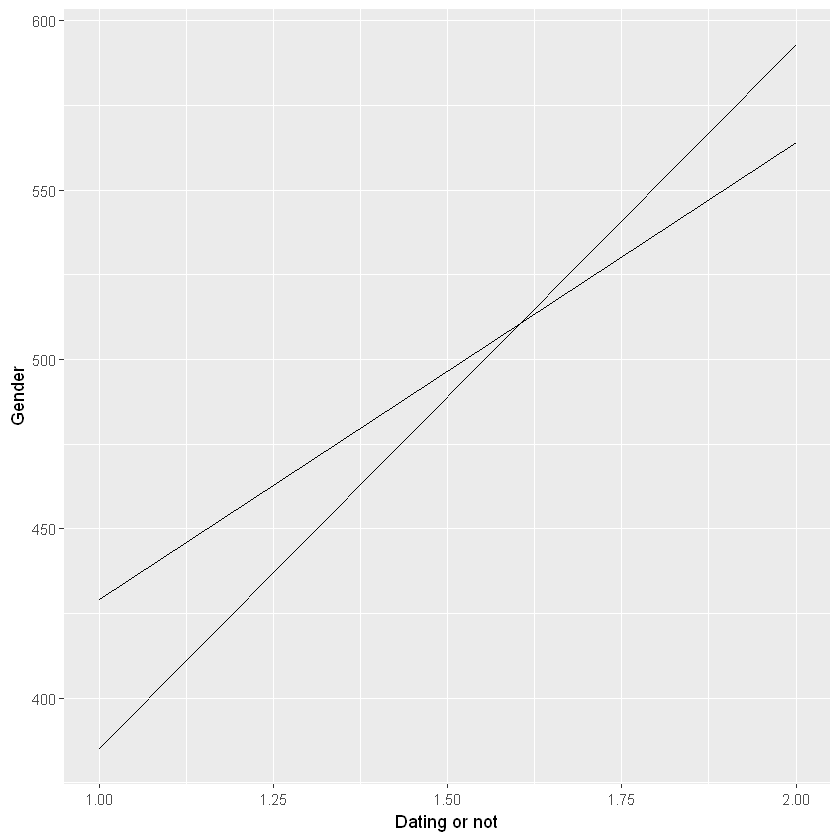

In [201]:
g <- ggplot(query5, aes(x = date3a , y = DATING, group=sex)) + geom_line() + ylab("Gender") + xlab("Dating or not")
g

References:
https://cran.r-project.org/web/packages/dplyr/dplyr.pdf